# CISC/CMPE 452/COGS 400 Assignment 2 - Backpropagation (15 points)  

Please put your name and student id here

    Liam Patterson, #20121376

- The notebook file has clearly marked blocks where you are expected to write code. Do not write or modify any code outside of these blocks.
- Make sure to restart and run all the cells from the beginning before submission. Do not clear out the outputs. You will only get credit for code that has been run.
- Mark will be deducted based on late policy (-1% of the course total marks per day after due date until the end date after which no assignments will be accepted)


## [Part 1 (9 points)](#Part-1)  

### Build Model1 (7 points)  
Use Pytorch to implement a three-layer Neural Network (input layer - hidden layer - output layer) and update the weights with backpropagation  
- 1. Implement forward and calculate the output (1 point)  
- 2. Calculate errors and loss (3 points)  
- 3. Update the weights with backpropagation (1 points)  
- 4. Predict function (1 point)  
- 5. Activation function (Sigmoid function) (1 point)  

### Evaluator Function (1 point)  
Implement the evaluator function with Pytorch or Numpy only   
- Evaluation metrics include confusion matrix, accuracy, recall score, precision and F1 score

### Train and Evaluate Model1 (1 point)  
Train Model1 with customized hidden size, learning rate, number of iterations and batch size  
Use the predict function to predict the labels with the test dataset  
Evaluate the prediction results  
- Evaluation metrics include confusion matrix, accuracy, recall score, precision and F1 score

## [Part 2 (6 points)](#Part-2)  

Use another machine learning framework (**scikit-learn, Tensorflow and Pytorch**) to build MLP
e.g. 
  1. https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
  2. https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
  3. https://pytorch.org/tutorials/beginner/examples_nn/polynomial_nn.html#sphx-glr-beginner-examples-nn-polynomial-nn-py
  
### Build Model2-1 (2 points)  
Implement Model2-1 with the same hidden nodes and optimization function as the model in Part 1  
Train and validate model. Use the best model on validation dataset to test on the test dataset  

### Train and Evaluate Model2-1 (1 point)
Evaluate the prediction results  
- Evaluation metrics include confusion matrix, accuracy, recall score, precision and F1 score

### Build Model2-2 (2 points)  
Add one more hidden layer (2 hidden layers in total) to the model  
Describe Model2-2 (number of hidden nodes)  
Train and validate model. Use the best model on validation dataset to test on the test dataset  

### Train and Evaluate Model2-2 (1 point)
Evaluate the prediction results  
- Evaluation metrics include confusion matrix, accuracy, recall score, precision and F1 score

In [2]:
import torch
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST

In [3]:
# you can go to Edit - Notebook settings to select GPU under the Hardware accelerator
# check the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [4]:
# build the dataset (train, validation and test)
def load_MNIST(n_val=10000, n_sample=1000, sample=False):
    n_val = n_val
    n_sample = n_sample
    train = MNIST(root = '.', train = True, download = True)
    test = MNIST(root = '.', train = False, download = True)
    
    # data preprocessing
    x_train, x_test = train.data/255, test.data/255
    x_train = x_train.reshape(x_train.shape[0], -1)
    x_test = x_test.reshape(x_test.shape[0], -1)
    y_train = torch.nn.functional.one_hot(train.targets)
    y_test = torch.nn.functional.one_hot(test.targets)

    data_dict = {}
    if sample:
        data_dict['x_train'] = x_train[:-n_val][:n_sample]
        data_dict['y_train'] = y_train[:-n_val][:n_sample]
        data_dict['x_val'] = x_train[-n_val:][:n_sample//10]
        data_dict['y_val'] = y_train[-n_val:][:n_sample//10]
        data_dict['x_test'] = x_test[:n_sample//10]
        data_dict['y_test'] = y_test[:n_sample//10]
    else:
        data_dict['x_train'] = x_train[:-n_val]
        data_dict['y_train'] = y_train[:-n_val]
        data_dict['x_val'] = x_train[-n_val:]
        data_dict['y_val'] = y_train[-n_val:]
        data_dict['x_test'] = x_test
        data_dict['y_test'] = y_test
    return data_dict

In [5]:
# you can start with a small sample dataset by setting sample=True
data_dict = load_MNIST(sample=False)
print('Train data shape:', data_dict['x_train'].shape)
print('Train labels shape:', data_dict['y_train'].shape)
print('Validation data shape:', data_dict['x_val'].shape)
print('Validation labels shape:', data_dict['y_val'].shape)
print('Test data shape:', data_dict['x_test'].shape)
print('Test labels shape:', data_dict['y_test'].shape)

Train data shape: torch.Size([50000, 784])
Train labels shape: torch.Size([50000, 10])
Validation data shape: torch.Size([10000, 784])
Validation labels shape: torch.Size([10000, 10])
Test data shape: torch.Size([10000, 784])
Test labels shape: torch.Size([10000, 10])


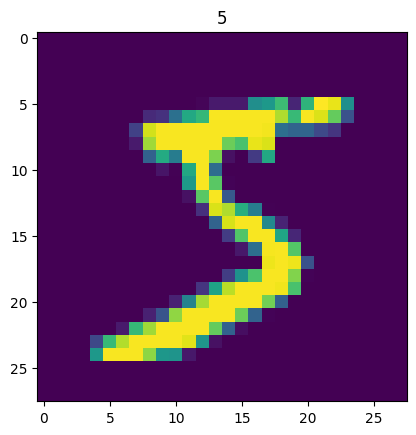

In [6]:
# plot an example
plt.imshow(data_dict['x_train'][0].reshape(28, 28))
plt.title(data_dict['y_train'][0].argmax().item())
plt.show()

## Part 1

In [14]:
# TODO: use the predict function to predict the lables with the test dataset
# TODO: evaluate the prediction results (accuracy, recall score, precision and F1 score)
####################################################################################################
# enter code here to calculate the hidden layer output and output layer output
# Write a function to analyze the result
import numpy as np
from torchmetrics import ConfusionMatrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

def evaluator(test_y, pred_y):
    
    num_classes = test_y.shape[1]
    test_label = torch.argmax(test_y, dim=1)
            
    confusion_matrix = ConfusionMatrix(num_classes=num_classes)
    confusion_matrix = confusion_matrix(pred_y, test_label)
    
#     convert from pytorch tensor to numpy array
    confusion_matrix = confusion_matrix.cpu().detach().numpy()

    accuracy = torch.sum(test_label == pred_y).item()/len(test_label)
    precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis = 0)
    recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis = 1)
    f1_score = (2*precision*recall)/(precision+recall)

    
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(confusion_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            ax.text(x=j, y=i,s=confusion_matrix[i, j], va='center', ha='center', size='large')
    
    ax.yaxis.set_ticks([i for i in range(num_classes)])
    ax.xaxis.set_ticks([i for i in range(num_classes)])
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
    
    for i in range(num_classes):
        print('Class ', i)
        print('precision: ', precision[i])
        print('recall: ', recall[i])
        print('f1_score: ', f1_score[i])
        print('---------')
    
    print('Overall:')
    print('precision: ', precision.mean())
    print('recall: ', recall.mean())
    print('f1_score: ', f1_score.mean())
        

####################################################################################################

In [10]:
class NN(object):
    def __init__(self, learning_rate, n_iters, batch_size, hidden_size, device, dtype=torch.float32):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.batch_size = batch_size
        self.hidden_size = hidden_size
        self.device = device
        self.dtype = dtype
        self.history = {}
        self.history['train_acc'], self.history['val_acc'], self.history['loss'] = [], [], []
    
    # 5. activation function
    def sigmoid(self, x):
        ####################################################################################################
        # enter code here to implement the activation function
        return 1/(1+torch.exp(-x))               
        ####################################################################################################

    def sigmoid_derivative(self, y):
        return y*(1.0-y)
    
    def train(self, x, y, x_val, y_val, verbose=1):
        n_train = x.shape[0]
        n_val = x_val.shape[0]
        input_size = x.shape[1]
        num_classes = y.shape[1]
        
        # weight initialization
        self.W1 = torch.randn(input_size, self.hidden_size, dtype=self.dtype, device=self.device) * 0.01
        self.W2 = torch.randn(self.hidden_size, num_classes, dtype=self.dtype, device=self.device) * 0.01
#         print('w1 shape', self.W1.shape)
#         print('w2 shape', self.W2.shape)

        # TODO: train the weights with the input data and labels
        for i in range(self.n_iters):
#             print('EPOCH: ', i)
            loss = 0
            data = getBatch(x, y, self.batch_size)
            count = 0
            for x_batch, y_batch in data:
                
                # 1. forward
                ####################################################################################################
                # enter code here to calculate the hidden layer output and output layer output
                hidden_activation = torch.matmul(x_batch, self.W1)
                hidden = self.sigmoid(hidden_activation)
        
                output_activation = torch.matmul(hidden, self.W2)
                output = self.sigmoid(output_activation)
                ####################################################################################################

                # 2. error and loss
                ####################################################################################################
                # enter code here to calculate the output error, MSE loss, delta output and delta hidden
                output_error = (y_batch - output)
                loss += (output_error**2).mean()
                # print('loss',loss)
                delta_output = output_error * self.sigmoid_derivative(output)

                w2_reshaped = torch.reshape(self.W2, (self.W2.shape[1], self.W2.shape[0]))                
                
                delta_hidden = torch.matmul(delta_output, w2_reshaped) * self.sigmoid_derivative(hidden)
                ####################################################################################################

                # 3. backward
                ####################################################################################################
                # enter code here to calculate delta weights and update the weights
                hidden_reshaped = torch.reshape(hidden, (hidden.shape[1], hidden.shape[0]))
                self.W2 += self.learning_rate * torch.matmul(hidden_reshaped, delta_output)
                
                x_reshaped = torch.reshape(x_batch, (x_batch.shape[1], x_batch.shape[0]))
                self.W1 += self.learning_rate * torch.matmul(x_reshaped, delta_hidden)
                ####################################################################################################

            # calculate the accuracy and save the training history
            y_pred = self.predict(x)
            train_acc = torch.sum(torch.argmax(y, dim=1) == y_pred) / n_train
            self.history['train_acc'].append(train_acc)
            self.history['loss'].append(loss)
            
            y_pred = self.predict(x_val)
            val_acc = torch.sum(torch.argmax(y_val, dim=1) == y_pred) / n_val
            self.history['val_acc'].append(val_acc)
            if verbose:
                print('epoch %d, loss %.4f, train acc %.3f, validation acc %.3f'
                  % (i + 1, loss, train_acc, val_acc))
    
    # 4. predict function 
    def predict(self, x):
        ####################################################################################################
        # enter code here to implement the predict function
        # TODO: use the trained weights to predict labels and return the predicted labels
        # remember to use torch.argmax() to return the true labels
        hidden_activation = torch.matmul(x, self.W1)
        hidden = self.sigmoid(hidden_activation)

        output_activation = torch.matmul(hidden, self.W2)
        output = self.sigmoid(output_activation)
    
        return torch.argmax(output, dim=1)
        ####################################################################################################


def getBatch(x, y, batch_size):
    n_epoch = x.shape[0] // batch_size
    for i in range(n_epoch):
        x_batch = x[i * batch_size : (i+1) * batch_size]
        y_batch = y[i * batch_size : (i+1) * batch_size]
        yield x_batch, y_batch
    x_batch = x[(i+1) * batch_size:]
    y_batch = y[(i+1) * batch_size:]    
    yield x_batch, y_batch

In [11]:
####################################################################################################
# enter code here to train Model1
# TODO: set your desired hidden size, learning rate, number of iterations and batch size
# remeber to load the dataset to the device (e.g. data_dict['x_train'].to(device))
hidden_size = 100

model = NN(0.01, 15, 1,  hidden_size, device)
model.train(data_dict['x_train'].to(device),
            data_dict['y_train'].to(device),
            data_dict['x_val'].to(device),
            data_dict['y_val'].to(device), 
            verbose=1)

####################################################################################################

epoch 1, loss nan, train acc 0.793, validation acc 0.817
epoch 2, loss nan, train acc 0.885, validation acc 0.902
epoch 3, loss nan, train acc 0.900, validation acc 0.914
epoch 4, loss nan, train acc 0.909, validation acc 0.922
epoch 5, loss nan, train acc 0.916, validation acc 0.927
epoch 6, loss nan, train acc 0.922, validation acc 0.931
epoch 7, loss nan, train acc 0.927, validation acc 0.933
epoch 8, loss nan, train acc 0.931, validation acc 0.936
epoch 9, loss nan, train acc 0.934, validation acc 0.939
epoch 10, loss nan, train acc 0.937, validation acc 0.942
epoch 11, loss nan, train acc 0.940, validation acc 0.945
epoch 12, loss nan, train acc 0.942, validation acc 0.947
epoch 13, loss nan, train acc 0.945, validation acc 0.949
epoch 14, loss nan, train acc 0.946, validation acc 0.951
epoch 15, loss nan, train acc 0.948, validation acc 0.953


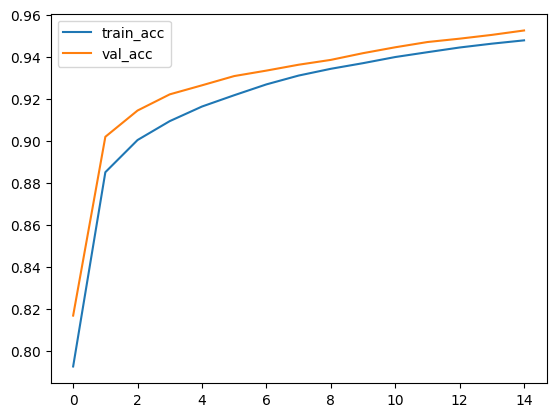

In [12]:
plt.plot(model.history['train_acc'], label='train_acc')
plt.plot(model.history['val_acc'], label='val_acc')
plt.legend()
plt.show()

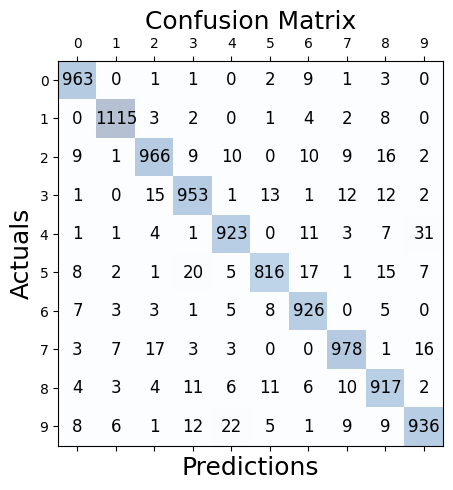

Class  0
precision:  0.9591633466135459
recall:  0.9826530612244898
f1_score:  0.9707661290322581
---------
Class  1
precision:  0.9797891036906854
recall:  0.9823788546255506
f1_score:  0.9810822701275846
---------
Class  2
precision:  0.9517241379310345
recall:  0.936046511627907
f1_score:  0.9438202247191011
---------
Class  3
precision:  0.9407699901283317
recall:  0.9435643564356435
f1_score:  0.9421651013346515
---------
Class  4
precision:  0.9466666666666667
recall:  0.939918533604888
f1_score:  0.9432805314256515
---------
Class  5
precision:  0.9532710280373832
recall:  0.9147982062780269
f1_score:  0.9336384439359268
---------
Class  6
precision:  0.9401015228426396
recall:  0.9665970772442589
f1_score:  0.953165208440556
---------
Class  7
precision:  0.9541463414634146
recall:  0.9513618677042801
f1_score:  0.9527520701412566
---------
Class  8
precision:  0.9234642497482377
recall:  0.9414784394250514
f1_score:  0.9323843416370106
---------
Class  9
precision:  0.93975903

In [15]:
####################################################################################################
# enter code here to evaluate Model1 with test set
# TODO: use the trained Model1 to predict the labels of test set and evaluate the results with the evaluator
predictions = model.predict(data_dict['x_test'].to(device))
evaluator(data_dict['y_test'].to(device), predictions)

####################################################################################################

## Part 2

### Model2-1

In [ ]:
####################################################################################################
# enter code here to implement Model2-1


####################################################################################################

In [ ]:
####################################################################################################
# enter code here to train Model2-1


####################################################################################################

In [ ]:
####################################################################################################
# enter code here to evaluate Model2-1


####################################################################################################

### Model2-2

In [ ]:
####################################################################################################
# enter code here to implement Model2-2


####################################################################################################

In [ ]:
####################################################################################################
# enter code here to train Model2-2


####################################################################################################

In [ ]:
####################################################################################################
# enter code here to evaluate Model2-2


####################################################################################################